In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [2]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = True
set_trainable = False


for layer in conv_base.layers:
    if layer.name in ["block5_conv1", "block5_conv2", "block5_conv3"]:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [3]:
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='hidden_1'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='hidden_2'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='hidden_3'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='hidden_4'),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax", name='output'),
])

In [4]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Nadam(learning_rate=0.0005),
    metrics=["accuracy"]
)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
hidden_2 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_3 (Dense)             (None, 512)               5

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train = np.dstack([x_train] * 3)
x_train = x_train.reshape((-1, 28, 28, 3))
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_train = x_train.astype("float32") / 255

x_test = np.dstack([x_test]*3)
x_test = x_test.reshape((-1, 28, 28, 3))
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=30,
                    verbose=1,
                    validation_split=0.2,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/30
188/188 [==============================] - 31s 164ms/step - loss: 1.1332 - accuracy: 0.6797 - val_loss: 0.3475 - val_accuracy: 0.8226
Epoch 2/30
188/188 [==============================] - 29s 155ms/step - loss: 0.2073 - accuracy: 0.8417 - val_loss: 0.1320 - val_accuracy: 0.8550
Epoch 3/30
188/188 [==============================] - 29s 155ms/step - loss: 0.1084 - accuracy: 0.8680 - val_loss: 0.0983 - val_accuracy: 0.8607
Epoch 4/30
188/188 [==============================] - 29s 155ms/step - loss: 0.0956 - accuracy: 0.8600 - val_loss: 0.0966 - val_accuracy: 0.8638
Epoch 5/30
188/188 [==============================] - 29s 155ms/step - loss: 0.0758 - accuracy: 0.8907 - val_loss: 0.0765 - val_accuracy: 0.8796
Epoch 6/30
188/188 [==============================] - 29s 155ms/step - loss: 0.0854 - accuracy: 0.8590 - val_loss: 0.0970 - val_accuracy: 0.7987
Epoch 7/30
188/188 [==============================] - 29s 155ms/step - loss: 0.0959 - accuracy: 0.8599 - val_loss: 0.0752 - val_ac

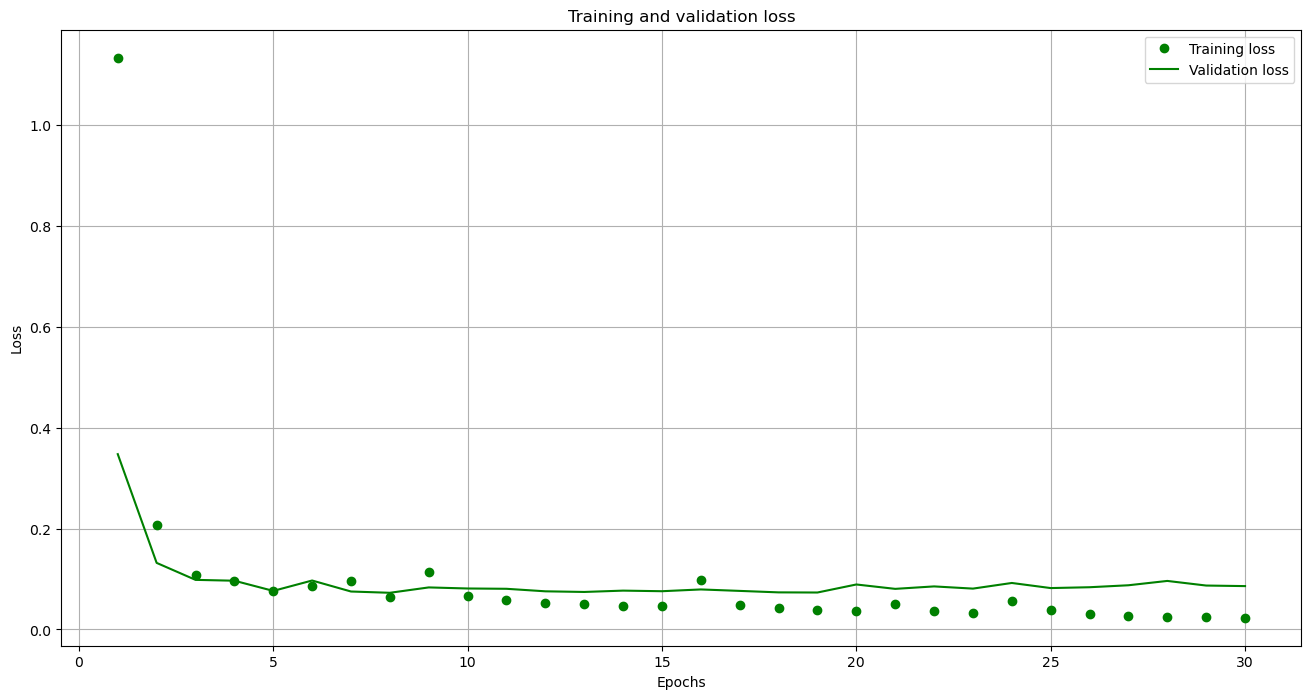

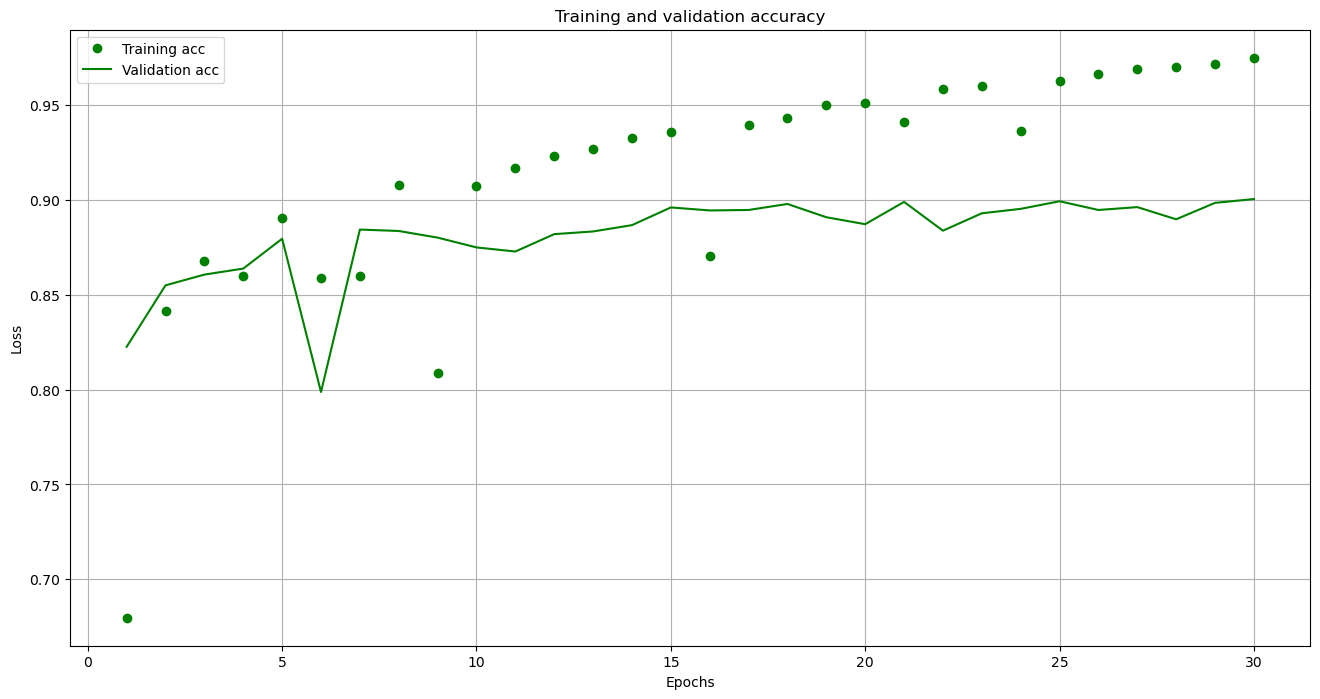

In [9]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (16, 8)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, history_dict['accuracy'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

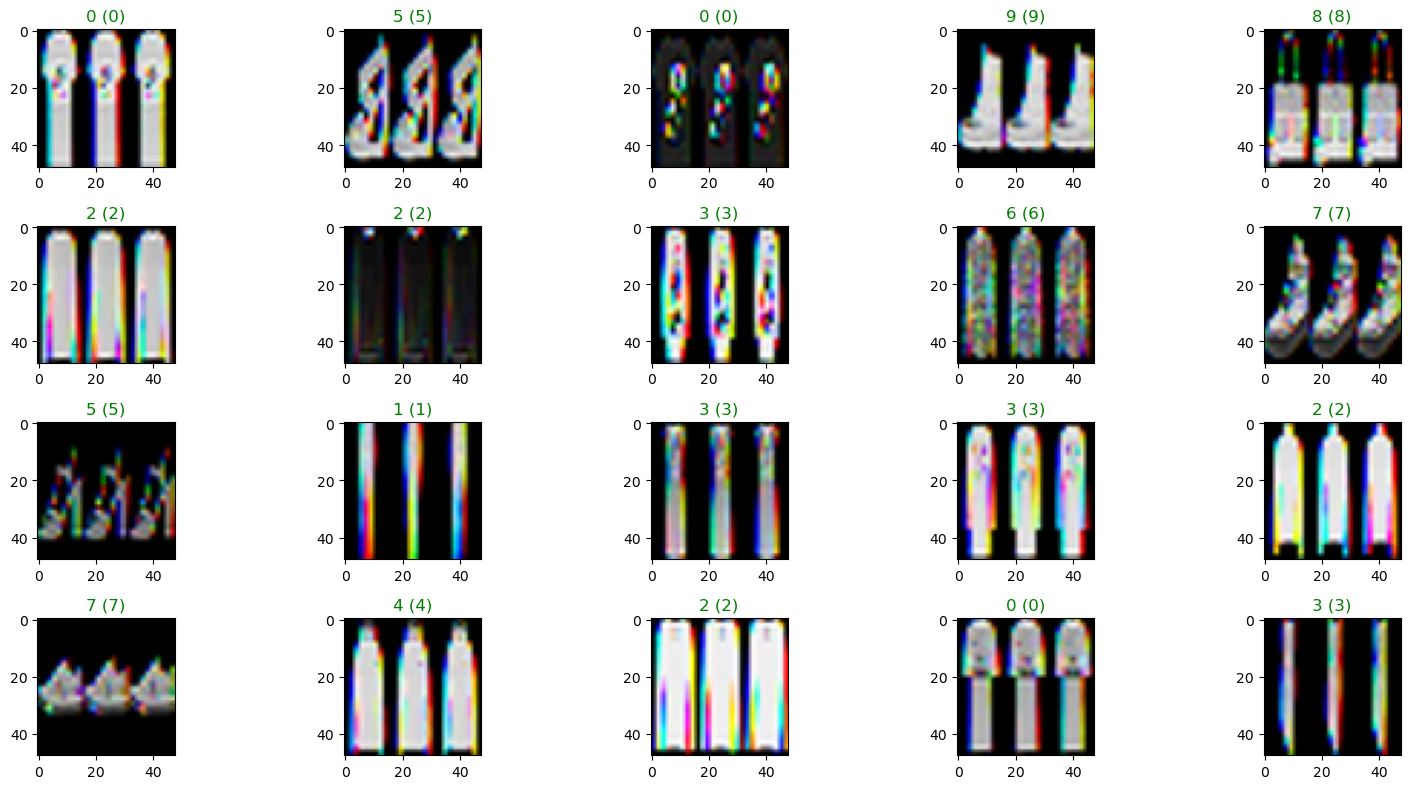

In [10]:
random_indices = np.random.choice(range(len(x_test)), size=20, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

predictions = model.predict(sample_images)

for i in range(len(sample_images)):
    plt.subplot(4, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    pred_y = np.argmax(sample_labels[i])
    true_y = np.argmax(predictions[i])
    color ="green" if pred_y == true_y else "red"
    plt.title("{} ({})".format(pred_y, true_y), color=color)
plt.tight_layout()
plt.show()